## Techniques of transform a text data to numberical

1. Count Vectorizer : The Count Vectorizer method transpose all the words into features and then provides a count of occurance of each word.


2. TF-IDF(Term Frequency Inverse Document Frequency): TF captures how important a word is to document without looking at the other documents.
IDF: It tells if a word can be used to distinguish documents. if a word appears  in frequently of the documents the IDF will be close to 0(Zero) or low weightage given to that word.


3. LDA(Latent Dirichlet Allocation): LDA is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model.


### List of metrics to evaluate classification model

1. confusion matrix
2. False Positive rate (Type 1 error)
3. False negative Rate (Type 2 error)
4. Recall
5. Precision
6. Accuracy
7. F1 - Score
8. ROC - AUC Curve

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
source = requests.get('https://www.ndtv.com/india-news/unlock-4-coronavirus-no-e-pass-needed-unlock-4-opens-inter-state-travel-for-all-people-goods-2287404').text
soup = BeautifulSoup(source,'lxml')

In [3]:
article = soup.find('section')

In [4]:
headline = article.h1.text
print(headline)

 No E-Pass Needed: Unlock 4 Opens Inter-State Travel For All People, Goods 


In [5]:
summary = article.h2.text
print(summary)

 Unlock 4: All restrictions on inter-state or inter-district movement of people and goods have been removed under the new guidelines meant to start more activities outside containment zones amid the coronavirus pandemic. 


In [6]:
article1 = soup.find('div', class_='sp-cn ins_storybody')

In [7]:
con = []
for i in range(1,len(article1.find_all('p'))):
    content = article.find_all('p')[i].text
    con.append(content)

print(con)

['Starting September 1, people will no longer need to get e-passes or register their details on government websites to travel anywhere within the country, rules issued by the Union Ministry of Home Affairs as part of Unlock 4 state.', 'As per the new guidelines, meant to start more activities outside containment zones amid the coronavirus pandemic, there will be no restriction on inter-state or inter-district movement of people and goods.', 'Unlock 4 rules, however, do not say anything about the quarantine policy which state governments have been altering in keeping with their Covid caseload.', 'International air travel of passengers, except as permitted by the Home Ministry, also remains suspended for now.', 'The Central Government rules also disallow state governments from imposing any local lockdowns outside containment zones without prior consultation with it.', 'State-specific lockdowns in view of rising coronavirus cases, even night curfew, have affected inter-state traffic, move

In [8]:
string = ''
news = string.join(con)

In [9]:
report = article.find('div', class_ = "pst-by_ul").text
reported_by = report.split('by')[1].split(',')[0]

In [10]:
date = report.split(': ')[-1]
date

'August 29, 2020 9:11 pm IST'

In [11]:
df = pd.DataFrame({'HeadLine': [headline], 'Summary': [summary],'Reported_by': reported_by,'date':date, 'news':[news]}, index=None)
print(df)

                                            HeadLine  \
0   No E-Pass Needed: Unlock 4 Opens Inter-State ...   

                                             Summary    Reported_by  \
0   Unlock 4: All restrictions on inter-state or ...   Neeta Sharma   

                          date  \
0  August 29, 2020 9:11 pm IST   

                                                news  
0  Starting September 1, people will no longer ne...  


In [12]:
df.to_csv('cyber.csv', index = False)

In [13]:
df1 = pd.read_csv('cyber.csv')

In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [15]:
df1

,HeadLine,Summary,Reported_by,date,news
0,No E-Pass Needed: Unlock 4 Opens Inter-State ...,Unlock 4: All restrictions on inter-state or ...,Neeta Sharma,"August 29, 2020 9:11 pm IST","Starting September 1, people will no longer ne..."


In [16]:
news =  df1.iloc[0,4]

In [20]:
sentences = nltk.sent_tokenize(news)
len(sentences)

3

In [21]:

list1 = []
for i in range(0, len(sentences)):
    message = re.sub('[^a-zA-Z]',' ',sentences[i])
    message = message.lower()
    message = message.split()
    
    message = ' '.join(message)
    list1.append(message)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(list1).toarray()

In [23]:
x.shape

(3, 176)

In [26]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175
0,1,1,3,1,1,2,1,1,1,2,1,1,0,5,1,1,1,0,1,3,2,2,2,1,1,1,2,1,3,1,1,1,1,2,3,1,2,1,1,0,1,0,1,0,1,1,1,0,1,1,1,1,2,1,1,0,0,1,0,1,1,2,2,2,2,1,0,3,0,2,0,1,1,3,1,0,1,3,1,1,1,1,1,0,1,2,1,0,1,0,2,0,1,2,1,2,1,2,1,1,1,7,2,0,2,2,2,0,1,1,1,1,1,2,1,1,0,1,1,1,1,0,1,1,0,0,1,1,0,1,2,4,1,1,1,1,0,0,1,0,1,1,6,1,1,1,1,0,11,1,1,2,1,0,1,4,1,1,2,1,1,1,3,1,0,1,0,1,1,1,3,4,1,1,0,2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,2,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [32]:
wordcloud = WordCloud(background_color='black').generate(news)

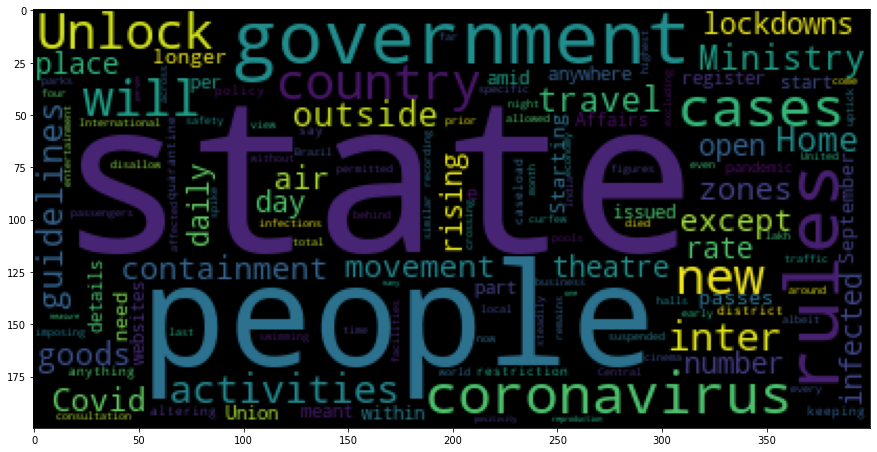

In [33]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.show()

### interpretation

#we can see in above diagram that most frequent words are government, people, state, rules, coronavirus
where as few occurance words are day, issued, open etc